<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Project_6_Deep_Learning_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning

This project introduces us to deep learning. The deep learning process is a huge leap forward in data science and the field is less than 15 years old. The processing is significantly different from our previous projects so you will basically be provided a walkthrough document delineating the steps - much like Project 1. Deep learning is fascinating and I just want you to go through the process so you can appreciate its power.



The data collection portion of deep learning projects is a rather complex task. In other words, there is no CSV file that we can load to serve as our training data. Constructing a training data set is a rather large undertaking. We have imported all the training images (took hours) and I will show you how you can load the training data through the "pickle" process.



There are three files in this data set:
- [the feature set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle ), i.e. images of dogs and cats ( mostly )
- [the target set]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle ), i.e. the label (0/1) that something is a dog or cat ( mostly )
- [a test image]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg )





This project will classify new, unseen images of cats and dogs. This was one of the first big success stories of deep learning and we will go through the process of building a learning algorithm that will do this task. Distinguishing a picture of a cat from a picture of a dog is easy for humans to do, but had been notoriously difficult to get a computer learning to perform well on the task. Deep learning solved that.


The same data sets as above, but you can copy the links by viewing the markdown directly to bypass Google Colab's annoying "You are leaving Colab" link.




https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg


## Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition




*  This is a supervised learning model with binary classification. The project will use a Convolutional Neural Network model & is trained to analyze test images to determine whether the image is a dog (0) or a cat (1).  





* Load necessary packages.



In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [2]:
url_x = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
!curl -O {url_x}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  61.5M      0  0:00:03  0:00:03 --:--:-- 61.5M


In [3]:
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
!curl -O {url_y}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   236k      0 --:--:-- --:--:-- --:--:--  236k


In [4]:
data_x = pd.read_pickle( url_x )
data_x.shape

(24946, 100, 100, 1)

In [5]:
data_y = pd.read_pickle( url_y )

In [6]:
ls -la --si

total 250M
drwxr-xr-x 1 root root 4.1k Jul 22 15:37 ./
drwxr-xr-x 1 root root 4.1k Jul 22 15:31 ../
drwxr-xr-x 4 root root 4.1k Jul 18 13:38 .config/
drwxr-xr-x 1 root root 4.1k Jul 18 13:38 sample_data/
-rw-r--r-- 1 root root 250M Jul 22 15:37 X.pickle
-rw-r--r-- 1 root root  50k Jul 22 15:37 y.pickle


In [7]:
with open('data_x.p', 'wb') as file:
    pickle.dump(data_x, file)

In [8]:
ls -la

total 487304
drwxr-xr-x 1 root root      4096 Jul 22 15:37 ./
drwxr-xr-x 1 root root      4096 Jul 22 15:31 ../
drwxr-xr-x 4 root root      4096 Jul 18 13:38 .config/
-rw-r--r-- 1 root root 249460168 Jul 22 15:37 data_x.p
drwxr-xr-x 1 root root      4096 Jul 18 13:38 sample_data/
-rw-r--r-- 1 root root 249460166 Jul 22 15:37 X.pickle
-rw-r--r-- 1 root root     49948 Jul 22 15:37 y.pickle


In [9]:
with open('data_y.p', 'wb') as file:
    pickle.dump(data_y, file)

In [10]:
ls -la --si

total 500M
drwxr-xr-x 1 root root 4.1k Jul 22 15:37 ./
drwxr-xr-x 1 root root 4.1k Jul 22 15:31 ../
drwxr-xr-x 4 root root 4.1k Jul 18 13:38 .config/
-rw-r--r-- 1 root root 250M Jul 22 15:37 data_x.p
-rw-r--r-- 1 root root  50k Jul 22 15:37 data_y.p
drwxr-xr-x 1 root root 4.1k Jul 18 13:38 sample_data/
-rw-r--r-- 1 root root 250M Jul 22 15:37 X.pickle
-rw-r--r-- 1 root root  50k Jul 22 15:37 y.pickle


In [11]:
with open('data_x.p', 'rb') as file:
    data_x_read = pickle.load(file)

type(data_x_read)

numpy.ndarray

In [12]:
with open('data_y.p', 'rb') as file:
    data_y_read = pickle.load(file)

type(data_y_read)

list

In [13]:
data_y = np.array(data_y_read)
type(data_y)

numpy.ndarray

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [14]:
X_scaled = data_x_read/255

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [15]:
X_scaled.shape

(24946, 100, 100, 1)

In [16]:
y = data_y
y.shape

(24946,)

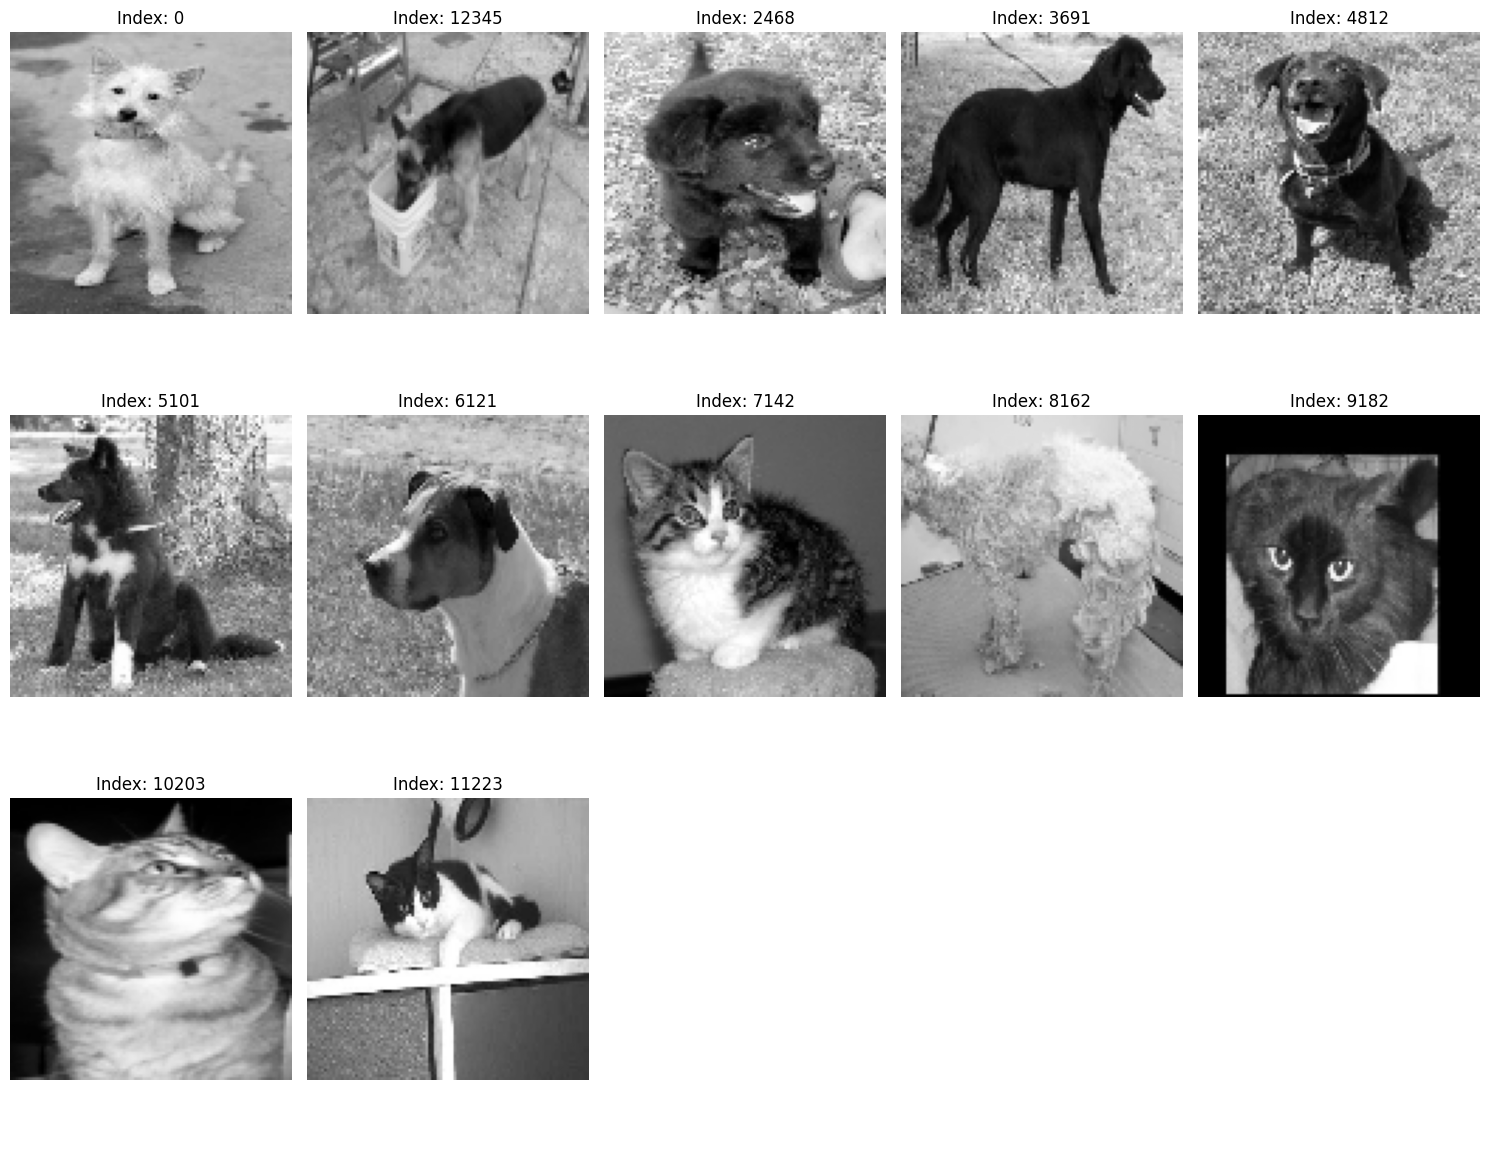

In [17]:
import matplotlib.pyplot as plt

# Pick specific indices you want to show
selected_indices = [0, 12345, 2468, 3691, 4812, 5101, 6121, 7142, 8162, 9182, 10203, 11223]

# Set up the grid size based on how many images
n = len(selected_indices)
cols = 5  # adjust as needed
rows = (n + cols - 1) // cols  # auto-calculate rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4* rows))

# If there's only one row, axes may not be a 2D array
axes = axes.flatten()

for i, idx in enumerate(selected_indices):
    axes[i].imshow(X_scaled[idx], cmap='gray')
    axes[i].set_title(f"Index: {idx}")
    axes[i].axis('off')

# Hide unused axes if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



In [18]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
print(type(y_train))

# Verifying the shapes and types
print("Training set (X):", X_train.shape, "Type:", type(X_train))
print("Training set (y):", len(y_train), "Type:", type(y_train))
print("Testing set (X):", X_test.shape)
print("Testing set (y):", len(y_test))

<class 'numpy.ndarray'>
Training set (X): (19956, 100, 100, 1) Type: <class 'numpy.ndarray'>
Training set (y): 19956 Type: <class 'numpy.ndarray'>
Testing set (X): (4990, 100, 100, 1)
Testing set (y): 4990


In [19]:
X_train[0].shape

(100, 100, 1)

#### Build model

In [20]:
model = Sequential()
# first 2D
model.add(
  Conv2D(
    name = "input1",
    input_shape = (100,100,1),
    filters = 25,
    kernel_size = (3,3),
    activation = 'relu',
  ))
# first MaxPooling
model.add(
  MaxPooling2D(
    name = "input2",
    pool_size = (2,2)
  ))
# second 2D
model.add(
  Conv2D(
    name = "input3",
    filters = 75,
    kernel_size = (3,3),
    activation = 'relu',
 ))
# second MaxPooling
model.add(
  MaxPooling2D(
    name = "input4",
    pool_size = (2,2)
  ))
# flatten for output
model.add(
    Flatten())
# define output
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid'
  ))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# # use this model to test different updates
# model = Sequential()

# # First convolution + pooling
# model.add(
#     Conv2D(
#         name="conv1",
#         filters=64,
#         kernel_size=(3, 3),
#         activation='relu',
#         input_shape=x_train.shape[1:]
#     )
# )
# model.add(
#     MaxPooling2D(pool_size=(2,2))
# )

# # Second convolution + pooling
# model.add(
#     Conv2D(
#         name="conv2",
#         filters=64,
#         kernel_size=(3, 3),
#         activation='relu'
#     )
# )
# model.add(
#     MaxPooling2D(pool_size=(2,2))
# )

# # Flatten and dense output
# model.add(
#     Flatten()
# )
# model.add(
#     Dense(
#       name="dense1",
#       units=64,           # adjust this number
#       activation='relu'
#       ))

# model.add(Dropout(0.5))    # prevents overfitting. Dropout for regularization

# model.add(
#     Dense(
#         name="output",
#         units=1,
#         activation='sigmoid'  # Correct activation for binary classification
#     )
# )

Interpretation (val_split=0.25, epochs=5, batch_size=32):

Avg accuracy: 95.104% , avg loss: 13.132% , avg val_acc: 75.062% , avg val_loss: 77.622%

Epoch 1/5 = accuracy: 0.9220 - loss: 0.1932 - val_accuracy: 0.7452 - val_loss: 0.6272

Epoch 2/5 = accuracy: 0.9418 - loss: 0.1584 - val_accuracy: 0.7603 - val_loss: 0.7256

Epoch 3/5 = accuracy: 0.9566 - loss: 0.1217 - val_accuracy: 0.7553 - val_loss: 0.7815

Epoch 4/5 = accuracy: 0.9640 - loss: 0.0995 - val_accuracy: 0.7422 - val_loss: 0.8709

Epoch 5/5 = accuracy: 0.9708 - loss: 0.0838 - val_accuracy: 0.7501 - val_loss: 0.8759
- Model might be overfitting — doing very well on training but worse on validation.
- Possible next steps:
    - Add dropout layers (to reduce overfitting) 0.5 -> 0.25
    - Reduce model complexity (e.g., fewer filters or layers)
    - Use more training data

model.fit(x_train, y_train, validation_split=0.25, epochs=3, batch_size=64)

Epoch 1/3
accuracy: 0.5666 - loss: 0.6784 - val_accuracy: 0.6605 - val_loss: 0.6283

Epoch 2/3
accuracy: 0.6644 - loss: 0.6167 - val_accuracy: 0.7068 - val_loss: 0.5640

Epoch 3/3
accuracy: 0.7236 - loss: 0.5459 - val_accuracy: 0.7316 - val_loss: 0.5378



*   increase epochs to 6

In [24]:
# # Watch the validation loss. If it doesn't improve after 3 tries (epochs), stop training and go back to the best version of the model.
# from keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#### Compile model

In [25]:
# Compile the Model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(), # Correct loss for sigmoid output
              # loss=SparseCategoricalCrossentropy(),
              metrics=[BinaryAccuracy()])

#### Fit and train model

In [26]:
# Fit model
# Train the Model
history = model.fit(X_train, y_train, epochs=10)#callbacks=[early_stop]

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - binary_accuracy: 0.6151 - loss: 0.6436
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - binary_accuracy: 0.7539 - loss: 0.5037
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.7938 - loss: 0.4475
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8170 - loss: 0.4067
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8361 - loss: 0.3713
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8549 - loss: 0.3393
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8766 - loss: 0.3017
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8946 - loss: 0.2588
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.9066 - loss: 0.2382
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.9189 - loss: 0.2064
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.8119 

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input1 (Conv2D)                 │ (None, 98, 98, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input2 (MaxPooling2D)           │ (None, 49, 49, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input3 (Conv2D)                 │ (None, 47, 47, 75)     │        16,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input4 (MaxPooling2D)           │ (None, 23, 23, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 39675)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        39,676 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,630 (666.53 KB)

 Trainable params: 56,876 (222.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,754 (444.36 KB)

#### Plot model

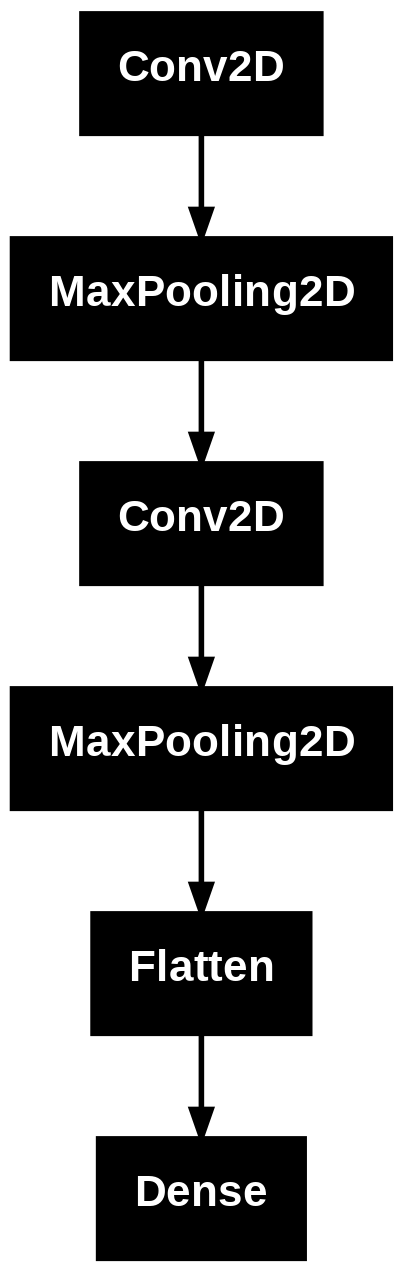

In [28]:
plot_model(model)

#### Evaluate model

In [29]:
# Evaluate model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8119 - loss: 0.5086
0.517335832118988
0.8038076162338257


In [30]:
# make predictions based on testing set
predictions = model.predict(X_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [31]:
predictions.shape

(4990, 1)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


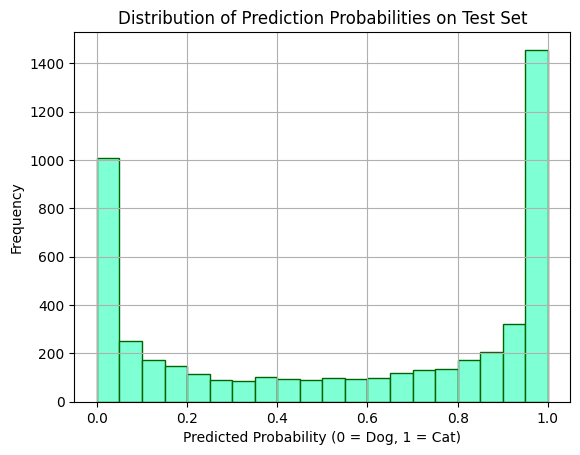

In [32]:
# Plot Distribution of Prediction Probabilities
pred_probs = model.predict(X_test).flatten()

plt.hist(pred_probs, bins=20, color='aquamarine', edgecolor='darkgreen')
plt.title('Distribution of Prediction Probabilities on Test Set')
plt.xlabel('Predicted Probability (0 = Dog, 1 = Cat)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

I wanted to see some of the images that were misclassified & correctly classified.

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


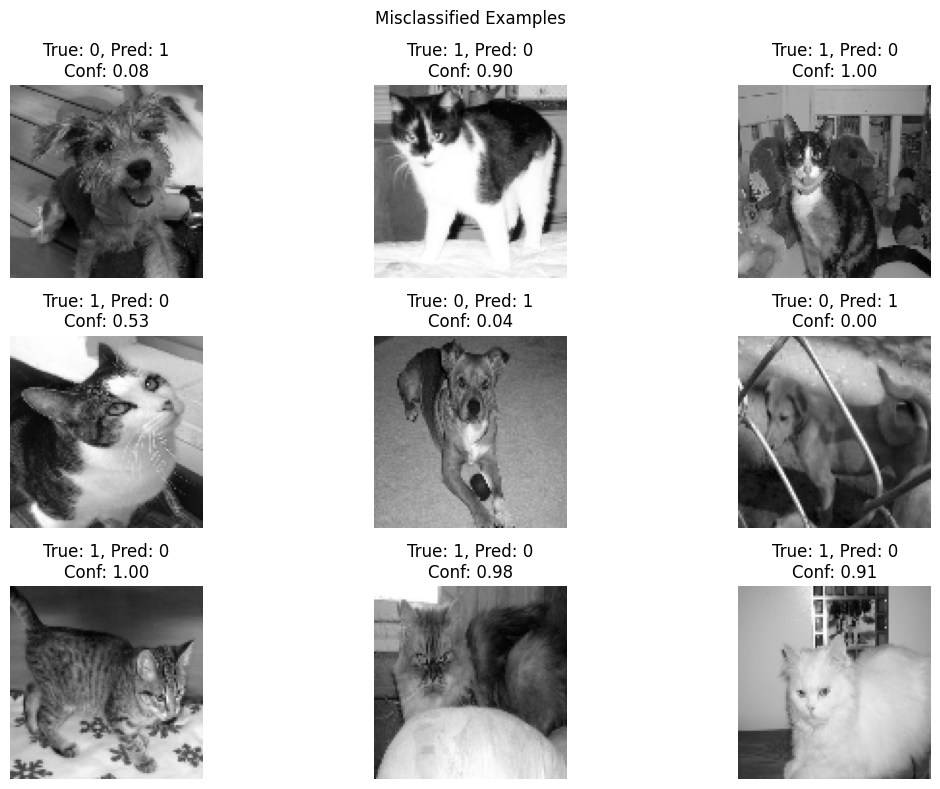

In [33]:
# Misclassified Examples
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities and convert to binary predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs < 0.5).astype(int).flatten()

# Identify misclassified indices
misclassified_idxs = np.where(y_pred != y_test)[0]

# Plot a few misclassified examples
num_to_display = 9
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_idxs[:num_to_display]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}\nConf: {y_pred_probs[idx][0]:.2f}")
    plt.axis('off')
plt.suptitle("Misclassified Examples")
plt.tight_layout()
plt.show()


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


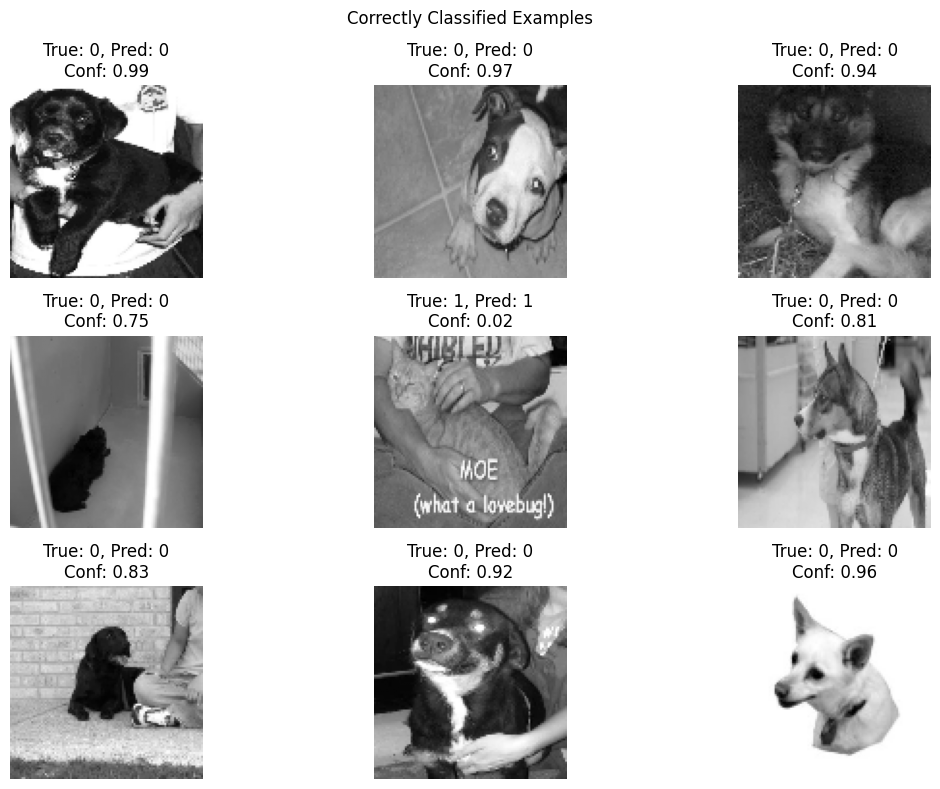

In [34]:
# Correctly classified examples
import numpy as np
import matplotlib.pyplot as plt

# Get predictions and flatten
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs < 0.5).astype(int).flatten()

# Find correctly classified indices
correct_idxs = np.where(y_pred == y_test)[0]

# Plot a few correct examples
num_to_display = 9
plt.figure(figsize=(12, 8))
for i, idx in enumerate(correct_idxs[:num_to_display]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}\nConf: {y_pred_probs[idx][0]:.2f}")
    plt.axis('off')
plt.suptitle("Correctly Classified Examples")
plt.tight_layout()
plt.show()


## Communication of Results



* My model performed ok. It had a training accuracy of 92% with/ a training loss of 21%. The test accuracy was 81% and test loss was 47%. I could try some regularizations and early stopping to reduce my test loss.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.

Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Image 1: Cat (confidence: 1.00)


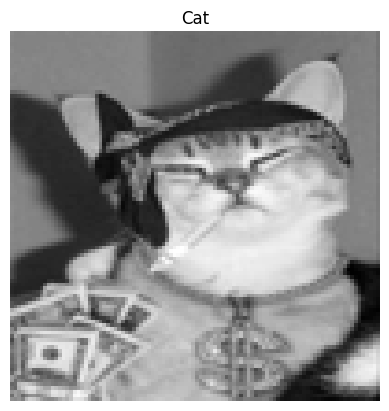

Image 2: Dog (confidence: 0.18)


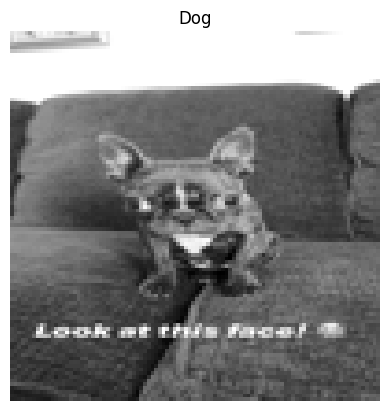

Image 3: Cat (confidence: 0.97)


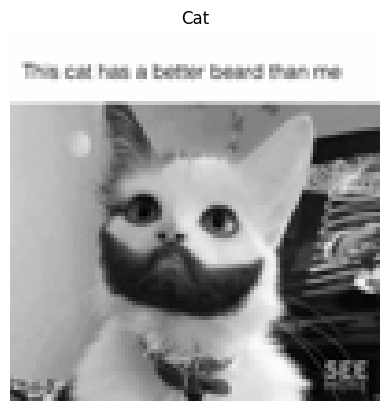

Image 4: Dog (confidence: 0.48)


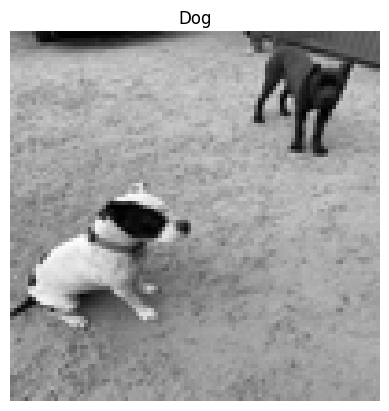

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive
from PIL import Image
import os

# Mount Google Drive
drive.mount('/content/drive')

# ✅ Define image paths in your Drive
image_paths = [
    "/content/drive/MyDrive/Photos/80399F7C-487A-49CF-9C35-C83D28AB6C0F-844-000000BE0C5D9AD9.jpeg",
    "/content/drive/MyDrive/Photos/94B9ED33-71D5-4B43-A79A-9828A2207DD5.jpg",
    "/content/drive/MyDrive/Photos/IMG_6005.JPG",
    "/content/drive/MyDrive/Photos/IMG_7934.jpeg"
]

# ✅ Set the expected size for your model input
IMG_SIZE = (100, 100)  # Replace with the size your model expects

# ✅ Preprocess the images: grayscale, resize, normalize
images = []
for path in image_paths:
    img = Image.open(path).convert("L")  # Convert to grayscale
    img = img.resize(IMG_SIZE)
    img = np.array(img) / 255          # Normalize
    images.append(img)

# ✅ Convert to numpy array and add channel dimension
images = np.array(images).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)  # shape: (batch, height, width, 1)

# ✅ Predict
predictions = model.predict(images)

# ✅ Display results
for i, pred in enumerate(predictions):
    label = "Dog" if pred <= 0.5 else "Cat"
    print(f"Image {i+1}: {label} (confidence: {pred[0]:.2f})")
    plt.imshow(images[i].reshape(IMG_SIZE), cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 1: Cat (confidence: 0.84)


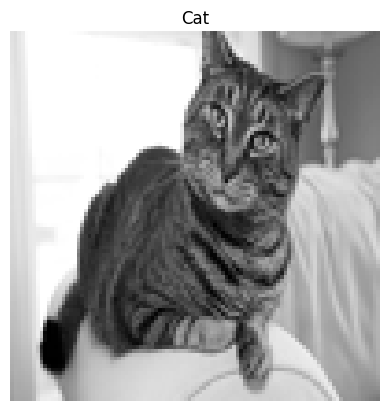

Image 2: Dog (confidence: 0.01)


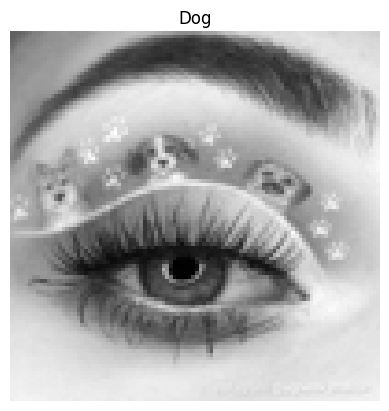

Image 3: Cat (confidence: 0.94)


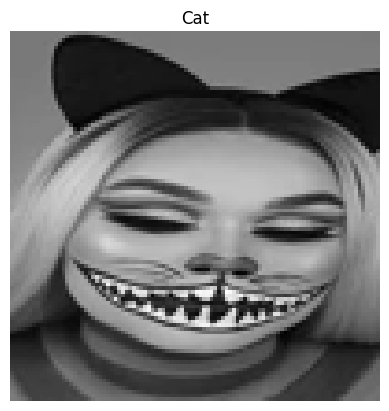

Image 4: Dog (confidence: 0.14)


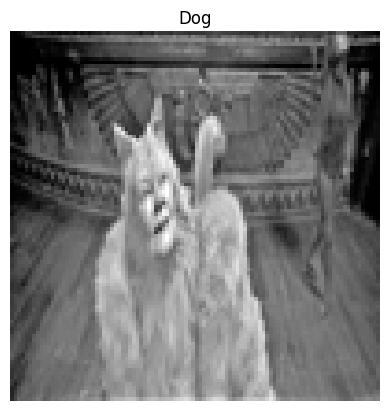

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive
from PIL import Image
import os

# Mount Google Drive
drive.mount('/content/drive')

# ✅ Define image paths in your Drive
image_paths = [
    "/content/drive/MyDrive/Photos/cat-care_general-cat-care_body1-left.jpg",
    "/content/drive/MyDrive/Photos/de25u89-72b77e11-2fc1-49e8-8658-9a56b6357fc6.jpg",
    "/content/drive/MyDrive/Photos/images.jpg",
    "/content/drive/MyDrive/Photos/Cats-Judi-Dench-Old-Deuteronomy-2019.jpg"
]

# ✅ Set the expected size for your model input
IMG_SIZE = (100, 100)  # Replace with the size your model expects

# ✅ Preprocess the images: grayscale, resize, normalize
images = []
for path in image_paths:
    img = Image.open(path).convert("L")  # Convert to grayscale
    img = img.resize(IMG_SIZE)
    img = np.array(img) / 255.0          # Normalize
    images.append(img)

# ✅ Convert to numpy array and add channel dimension
images = np.array(images).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)  # shape: (batch, height, width, 1)

# ✅ Predict
predictions = model.predict(images)

# ✅ Display results
for i, pred in enumerate(predictions):
    label = "Dog" if pred <= 0.5 else "Cat"
    print(f"Image {i+1}: {label} (confidence: {pred[0]:.2f})")
    plt.imshow(images[i].reshape(IMG_SIZE), cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()
